In [18]:
import numpy 
from keras.callbacks import TensorBoard
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# load dataset
# only will be taking first 10000 images to make training faster
df_train = pd.read_csv('train.csv')[:10000]

# normalize pixels (only for X)
X = df_train.ix[:,1:].astype('float32') / 255.0
y = df_train.ix[:,0]

X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Looking at digit 1


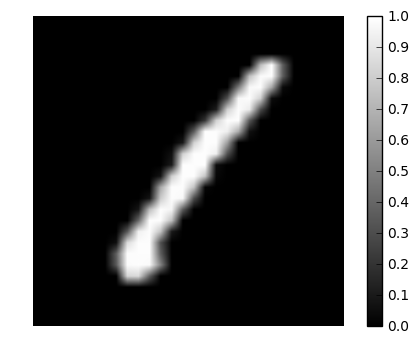

In [13]:
print("Looking at digit", y.ix[0,0])
plt.imshow(X.ix[0,:].values.reshape(28,28),cmap='gray')
plt.axis('off')
plt.colorbar()

In [14]:
# pd.get_dummies(y_train) gives us a dataframe
# this one by keras will give in array form so might as well use this

y = np_utils.to_categorical(y)
num_classes = y.shape[1]

y

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [15]:
# keras doesnt deal with dataframes, only matrixes
# reshape to 4d; (samples, rows, cols, channels) if data_format='channels_last'.
X = X.as_matrix().reshape(X.shape[0], 28, 28, 1)
X.shape

(10000, 28, 28, 1)

In [24]:
# simple CNN

simple = Sequential()
simple.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1), activation='relu', kernel_constraint=maxnorm(3)))
simple.add(Dropout(0.2))
simple.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
simple.add(MaxPooling2D())

simple.add(Flatten())

simple.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
simple.add(Dropout(0.5))

simple.add(Dense(num_classes, activation='softmax'))

In [25]:
# compile the model
simple.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.fit(X, y, validation_split=0.2, callbacks=[TensorBoard('./logs/run1')])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 23s - loss: 0.0617 - acc: 0.9819 - val_loss: 0.0553 - val_acc: 0.9880
Epoch 2/10
8000/8000 [==============================] - 24s - loss: 0.0550 - acc: 0.9851 - val_loss: 0.0855 - val_acc: 0.9790
Epoch 3/10
8000/8000 [==============================] - 24s - loss: 0.0608 - acc: 0.9828 - val_loss: 0.1043 - val_acc: 0.9710
Epoch 4/10
8000/8000 [==============================] - 24s - loss: 0.0447 - acc: 0.9881 - val_loss: 0.0673 - val_acc: 0.9790
Epoch 5/10
8000/8000 [==============================] - 24s - loss: 0.0494 - acc: 0.9851 - val_loss: 0.0865 - val_acc: 0.9820
Epoch 6/10
8000/8000 [==============================] - 24s - loss: 0.0460 - acc: 0.9863 - val_loss: 0.0707 - val_acc: 0.9770
Epoch 7/10
8000/8000 [==============================] - 24s - loss: 0.0469 - acc: 0.9870 - val_loss: 0.0607 - val_acc: 0.9840
Epoch 8/10
8000/8000 [==============================] - 24s - loss: 0.

In [17]:
# a CNN
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1), activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1), activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1), activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [28]:
# compile the model (rmsprop)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.2, callbacks=[TensorBoard('./logs/run2')])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 24s - loss: 0.0359 - acc: 0.9896 - val_loss: 0.0694 - val_acc: 0.9855
Epoch 2/10
8000/8000 [==============================] - 24s - loss: 0.0385 - acc: 0.9904 - val_loss: 0.0745 - val_acc: 0.9810
Epoch 3/10
8000/8000 [==============================] - 24s - loss: 0.0282 - acc: 0.9918 - val_loss: 0.0963 - val_acc: 0.9835
Epoch 4/10
8000/8000 [==============================] - 24s - loss: 0.0360 - acc: 0.9896 - val_loss: 0.0665 - val_acc: 0.9850
Epoch 5/10
8000/8000 [==============================] - 26s - loss: 0.0329 - acc: 0.9909 - val_loss: 0.0734 - val_acc: 0.9825
Epoch 6/10
8000/8000 [==============================] - 37s - loss: 0.0361 - acc: 0.9913 - val_loss: 0.1162 - val_acc: 0.9790
Epoch 7/10
8000/8000 [==============================] - 26s - loss: 0.0357 - acc: 0.9913 - val_loss: 0.0960 - val_acc: 0.9825
Epoch 8/10
8000/8000 [==============================] - 29s - loss: 0.

In [21]:
# compile the model (adam)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(X, y, validation_split=0.2, callbacks=[TensorBoard('./logs/run2')])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 24s - loss: 0.9924 - acc: 0.6507 - val_loss: 0.2699 - val_acc: 0.9215
Epoch 2/10
8000/8000 [==============================] - 25s - loss: 0.2507 - acc: 0.9263 - val_loss: 0.1000 - val_acc: 0.9690
Epoch 3/10
8000/8000 [==============================] - 26s - loss: 0.1631 - acc: 0.9512 - val_loss: 0.0941 - val_acc: 0.9700
Epoch 4/10
8000/8000 [==============================] - 25s - loss: 0.1317 - acc: 0.9621 - val_loss: 0.0897 - val_acc: 0.9735
Epoch 5/10
8000/8000 [==============================] - 25s - loss: 0.1148 - acc: 0.9664 - val_loss: 0.0830 - val_acc: 0.9770
Epoch 6/10
8000/8000 [==============================] - 26s - loss: 0.0945 - acc: 0.9714 - val_loss: 0.0939 - val_acc: 0.9745
Epoch 7/10
8000/8000 [==============================] - 26s - loss: 0.0822 - acc: 0.9764 - val_loss: 0.0684 - val_acc: 0.9785
Epoch 8/10
8000/8000 [==============================] - 25s - loss: 0.

In [23]:
model.save('my_model.h5')

In [30]:
history_dict = history.history
history_dict

{'acc': [0.98962499999999998,
  0.99037500000000001,
  0.99175000000000002,
  0.98962499999999998,
  0.99087499999999995,
  0.99124999999999996,
  0.99124999999999996,
  0.99350000000000005,
  0.99437500000000001,
  0.99062499999999998],
 'loss': [0.035879849584477826,
  0.038465390022030421,
  0.028228334965303588,
  0.035963961707327602,
  0.032857774541911113,
  0.036131427068336504,
  0.035731908526739631,
  0.028739309426882981,
  0.033573745116699964,
  0.038398305222179831],
 'val_acc': [0.98550000000000004,
  0.98099999999999998,
  0.98350000000000004,
  0.98499999999999999,
  0.98250000000000004,
  0.97899999999999998,
  0.98250000000000004,
  0.98650000000000004,
  0.98499999999999999,
  0.98699999999999999],
 'val_loss': [0.069403646866008334,
  0.074453276273321531,
  0.096287852962173015,
  0.066468395722185963,
  0.073351209062618175,
  0.11621092265905099,
  0.095976284735308809,
  0.087915571901005019,
  0.10508335072935529,
  0.10786817503376755]}

### simple visual for train/val loss

### more stuff on tensorboard

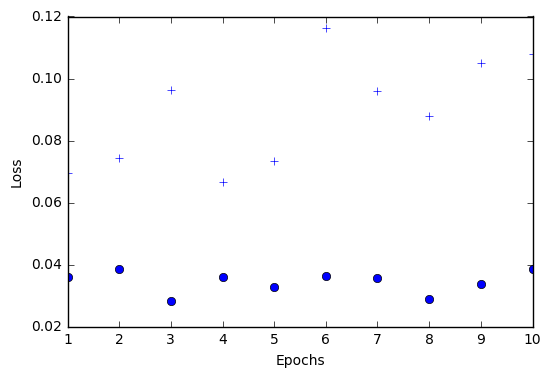

In [31]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

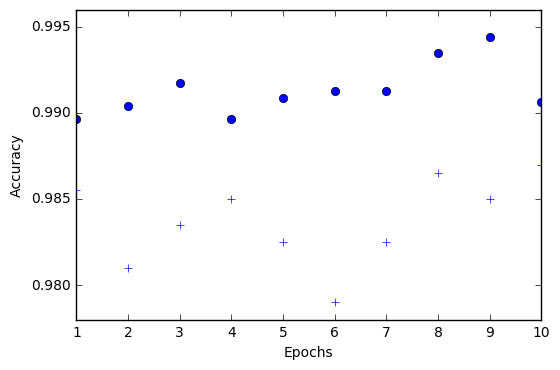

In [32]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()